# Notebook pt 3 - Explanation of ratio in histogram form, ordered increasingly by the full width at 10% of the maximum.  

# Section 1: Set Up

## Subsection a: Install Packages

The first few code samples parallel the previous notebooks, and are explained in Notebook 1.

In [6]:
import aplpy
import numpy as np
from astropy.io import fits
import matplotlib as mpl
import math
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import pandas as pd
from matplotlib.scale import SymmetricalLogTransform, InvertedSymmetricalLogTransform
#from scipy.stats import gaussian_kde
from heapq import nsmallest
from scipy.stats import gaussian_kde
from scipy import optimize

In [7]:
mpl.rcParams['font.size'] = 16
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['patch.linewidth'] = 2
mpl.rcParams['lines.markeredgewidth'] = 2
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['axes.linewidth'] = 2

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.pad'] = 5
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.pad'] = 5

mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.minor.size'] = 5

mpl.rcParams['figure.figsize'] = (10, 10/1.6)

In [8]:
Map12CO = fits.open(r'C:\Users\natac\Desktop\MIT_internship_2021\fits-files-week-of-June-21st\oriona_12co_XYV_smo60_int-70-125_resa.fits')[0]
Map13CO = fits.open(r'C:\Users\natac\Desktop\MIT_internship_2021\fits-files-week-of-June-21st\oriona_13co_XYV_smo60_int-70-125_resa.fits')[0]
MapC18O = fits.open(r'C:\Users\natac\Desktop\MIT_internship_2021\fits-files-week-of-June-21st\orion_c18o_smo60_int-490-565.fits')[0] 
MapHCN = fits.open(r'C:\Users\natac\Desktop\MIT_internship_2021\fits-files-week-of-June-21st\orion_hcn_smo60_int-440-585.fits')[0]
MapN2Hp = fits.open(r'C:\Users\natac\Desktop\MIT_internship_2021\fits-files-week-of-June-21st\orion_n2hp_smo60_int-450-590.fits')[0]
MapCN = fits.open(r'C:\Users\natac\Desktop\MIT_internship_2021\fits-files-week-of-June-21st\orion_cn_smo60_int-tot.fits')[0]
MapCCH = fits.open(r'C:\Users\natac\Desktop\MIT_internship_2021\fits-files-week-of-June-21st\orion_c2h_smo60_int-470-650.fits')[0]    

In [9]:
NoiseLine = {'12CO': 0.94 * 0.2 * sqrt(125.-70.) * 52.*(100./115.)/60.,
             '13CO': 0.28 * 0.2 * sqrt(125.-70.) * 52.*(100./110.)/60.,
             'C18O': 0.17549,
             'HCN': 0.52463,
             'N2H+': 0.32648,
             'CN': 0.70422,
             'CCH': 0.45627}
for Index in NoiseLine.keys():
    NoiseLine[Index] = NoiseLine[Index]

## Subsection b: Scatter Plots

As explained in Notebook 2, we ended with comparing the emission lines of the molecules using a scatter diagram. We can compare the molecules by placing one molecule on each axis. Refer to Notebook 2 for further explaination. For reference, two plots are displayed below. The first plot demonstrates a similar pairing of distribution lines, and the second plot illustrates a disimilar grouping. 

NameError: name 'ax' is not defined

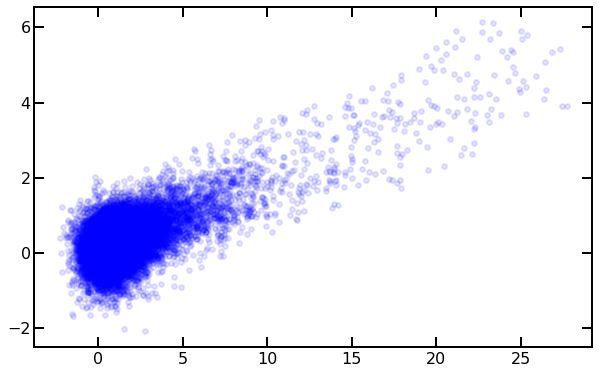

In [10]:
x = MapCN.data
y = MapCCH.data
plt.figure(1)
plt.scatter(x, y,
            marker='.', color='blue', alpha=0.1)
ax.set_ylim([-5, 15])
ax.set_xlabel('CN Velocity–Integrated Line Intensity  [K km/s]')
ax.set_ylabel('CCH Velocity–Integrated Line Intensity  [K km/s]')

plt.show()



x = Map12CO.data
y = MapN2Hp.data
plt.figure(1)
ax = plt.subplot(1,1,1)
plt.scatter(x, y,
            marker='.', color='blue', alpha=0.1)
ax.set_ylim([-5, 15])
ax.set_xlabel('$C^{12}O$ Velocity–Integrated Line Intensity  [K km/s]')
ax.set_ylabel('$N_2H+$ Velocity–Integrated Line Intensity  [K km/s]')

plt.show()

# Section 2: What does a histogram show us

We want to figure out a way to encompass all of the points on this scatter plot with one line. By plotting a line with a slope of 0.2, we can fit most of the data in that one line. This line very clearly shows where the points of the scatter plot should hit.

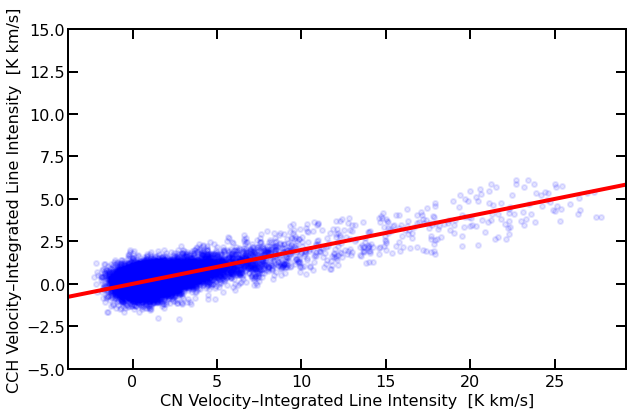

In [11]:
x = MapCN.data.flatten()
y = MapCCH.data.flatten()
plt.figure(1)
ax = plt.subplot(1,1,1)
plt.scatter(x, y,
            marker='.', color='blue', alpha=0.1)

axline((0, 0), (1, 0.2), linewidth=4, color='red')

ax.set_ylim([-5, 15])
ax.set_xlabel('CN Velocity–Integrated Line Intensity  [K km/s]')
ax.set_ylabel('CCH Velocity–Integrated Line Intensity  [K km/s]')

plt.show()

However, for a plot such as 12CO and N2H+, the slope would not encompass much of the data, and the slope would basically just be a generalization. We can add multiple lines to try and show all of the data, but it still doesn't really show where the data points should hit. We have three lines that together can come close to characterizing all of the data; however, if we were to limit this plot to only have one line the line would not show the data accurately. The pink line has a slope of 0.07, the orange line has a slope of 0.03, and the red line has a slope of 0.01.

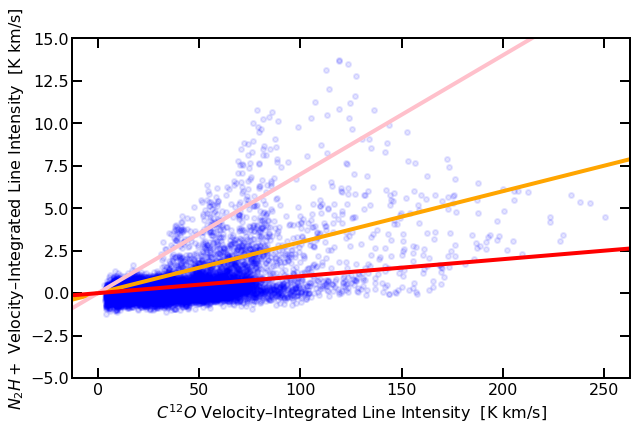

In [12]:
x = Map12CO.data.flatten()
y = MapN2Hp.data.flatten()
plt.figure(1)
ax = plt.subplot(1,1,1)
plt.scatter(x, y,
            marker='.', color='blue', alpha=0.1)

axline((0, 0), (1, 0.03), linewidth=4, color='orange')
axline((0, 0), (1, 0.07), linewidth=4, color='pink')
axline((0, 0), (1, 0.01), linewidth=4, color='red')

ax.set_ylim([-5, 15])
ax.set_xlabel('$C^{12}O$ Velocity–Integrated Line Intensity  [K km/s]')
ax.set_ylabel('$N_2H+$ Velocity–Integrated Line Intensity  [K km/s]')

plt.show()

The overall point of the histogram is to demonstrate whether the emission lines have a linear or complicated coorelation, quantitativly. We did this qualitativly on the scatter diagrams, by looking at how similar or dissimilar the plot was (see Section 1B). However, with a mass amount of data, we cannot divide all of the plots by eye. The program explained in this notebook shows us how to have the computer rank the similarities of the emission lines by organizing the histograms. A histogram is a type of chart that bins the data so that the peak is the bin that contains the most amount of data points within that bin range. Example: if your data set was (1,2,2,3,4,4,4,5,6), then the peak would be at 4, with a value of 3 data points. The histograms below work similarly, except with many more data points.

The reason why we cannot have the computer just organize the scatter plots is because the computer would organize the plots by their slopes. Shown above, one single line slope cannot show accurately where the data points should hit. A histogram provides us with a very clear way to organise the emission lines, without generalizations, in a way the computer can rank the similarities of. 

# Section 3: Preliminary Histogram

The first thing we are going to do is make a very basic histogram of the ratio of two molecules. We find the ratio by dividing one molecule by another molecule. Displayed below are two ratio histograms. 

The first histogram has a very clear peak, and the spike relatively narrow. This suggests similarity in the intensities of the emission lines. The second histogram however, has an extremely wide spike, and vauge peak. This suggests a lack of similarity between the emission lines. 

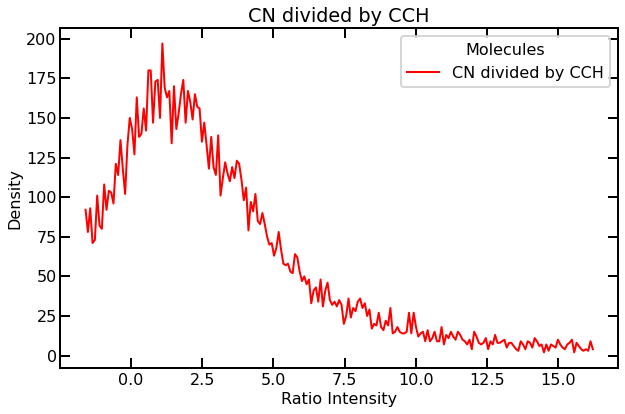

In [13]:
Data1 = MapCN.data
Data2 = MapCCH.data

Intensity_ratio = Data1/Data2
Median = np.nanmedian(Intensity_ratio)
x_title = 'CN'
x_label = 'CN'
x_color = 'pink'
y_title = 'CCH'
y_label = 'CCH'
y_color = 'red'
Histogram1 = np.histogram(Intensity_ratio, bins=np.arange(-1*(Median),10*(Median),0.05*Median))
    
plot((Histogram1[1][:-1] + Histogram1[1][1:])/2. ,
         (Histogram1[0]),'-', 
         color=y_color, label=(x_label + " divided by " + y_label))
plt.legend(prop={'size': 16}, title = 'Molecules')

title_text = x_title + ' divided by ' + y_title
plt.title(title_text)
plt.xlabel('Ratio Intensity')
plt.ylabel('Density')
plt.show()

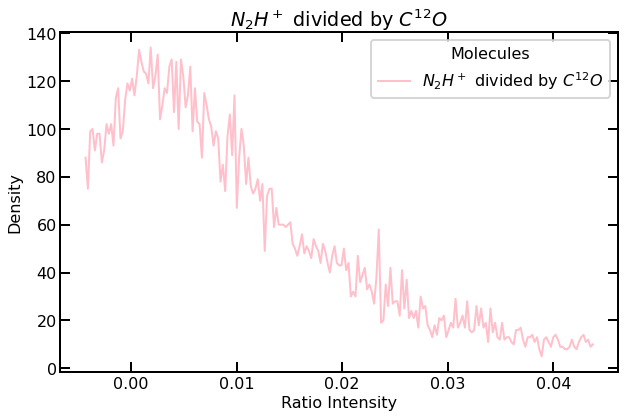

In [14]:
Data1 = MapN2Hp.data
Data2 = Map12CO.data

Intensity_ratio = Data1/Data2
Median = np.nanmedian(Intensity_ratio)
x_title = '$N_2H^+$'
x_label = '$N_2H^+$'
x_color = 'pink'
y_title = '$C^{12}O$'
y_label = '$C^{12}O$'
y_color = 'pink'
Histogram1 = np.histogram(Intensity_ratio, bins=np.arange(-1*(Median),10*(Median),0.05*Median))
    
plot((Histogram1[1][:-1] + Histogram1[1][1:])/2. ,
         (Histogram1[0]),'-', 
         color=y_color, label=(x_label + " divided by " + y_label))
plt.legend(prop={'size': 16}, title = 'Molecules')

title_text = x_title + ' divided by ' + y_title
plt.title(title_text)
plt.xlabel('Ratio Intensity')
plt.ylabel('Density')
plt.show()

## Subsection b: Remove Noise

Next, to accurately display the emmision lines, we must remove the noise from the data. It is important to remove the noise, as leaving noisy data can lead to inaccurate information. Because we are dividing one line intenisty by the other line intensity, if the one in the denomenator is slightly off because of noise, that can change the quotient could be exponentially innacurate. For example: noisy data could be 1.9/1.2 giving us 1.6, but the clean data is 2/1 giving us 2. If all of the data points are slightly off, than the image rendered could be entirely different than it should be.

Each molecule has a 'noise line', and we remove data less than three times the noise line. 

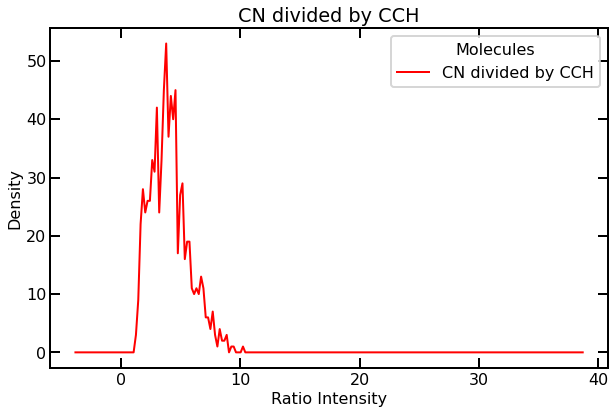

In [15]:
Data1 = MapCN.data
Data2 = MapCCH.data

Data1[Data1 < 3.0 * 0.70422] = np.nan
Data2[Data2 < 3.0 * 0.45627] = np.nan
    
Intensity_ratio = Data1/Data2
Median = np.nanmedian(Intensity_ratio)
x_title = 'CN'
x_label = 'CN'
x_color = 'pink'
y_title = 'CCH'
y_label = 'CCH'
y_color = 'red'
Histogram1 = np.histogram(Intensity_ratio, bins=np.arange(-1*(Median),10*(Median),0.05*Median))
    
plot((Histogram1[1][:-1] + Histogram1[1][1:])/2. ,
         (Histogram1[0]),'-', 
         color=y_color, label=(x_label + " divided by " + y_label))
plt.legend(prop={'size': 16}, title = 'Molecules')

title_text = x_title + ' divided by ' + y_title
plt.title(title_text)
plt.xlabel('Ratio Intensity')
plt.ylabel('Density')
plt.show()

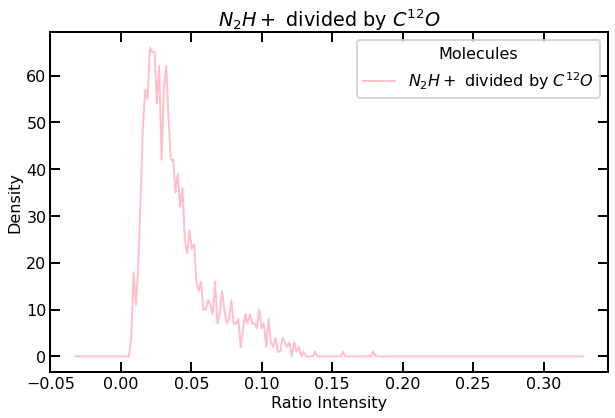

In [16]:
Data1 = MapN2Hp.data
Data2 = Map12CO.data

Data1[Data1 < 3.0 * 0.32648] = np.nan
Data2[Data2 < 3.0 * 0.94 * 0.2 * sqrt(125.-70.) * 52.*(100./115.)/60.] = np.nan

Intensity_ratio = Data1/Data2
Median = np.nanmedian(Intensity_ratio)
x_title = '$N_2H+$'
x_label = '$N_2H+$'
x_color = 'pink'
y_title = '$C^{12}O$'
y_label = '$C^{12}O$'
y_color = 'pink'
Histogram1 = np.histogram(Intensity_ratio, bins=np.arange(-1*(Median),10*(Median),0.05*Median))
    
plot((Histogram1[1][:-1] + Histogram1[1][1:])/2. ,
         (Histogram1[0]),'-', 
         color=y_color, label=(x_label + " divided by " + y_label))
plt.legend(prop={'size': 16}, title = 'Molecules')

title_text = x_title + ' divided by ' + y_title
plt.title(title_text)
plt.xlabel('Ratio Intensity')
plt.ylabel('Density')
plt.show()

## Subsection c: Normalize axis

However, you can see that the peaks are on completely different scales, and our goal is to compare the shape of the ratios. So the next step that we want to do is normalize the y axis. We will make both histograms peak at one, by dividing the entire data array by the maximum in that array, forcing the peak to be one. 

We will also normalize these plots along the x axis by their median. We will divide the entire data set by the median of that data set, and then we will plot points from -1 to 10 with bins at 0.05 increments. For us to accurately compare the plots, we must make sure the plots are normalized on both the x and y axis. Below are the normalized plots.

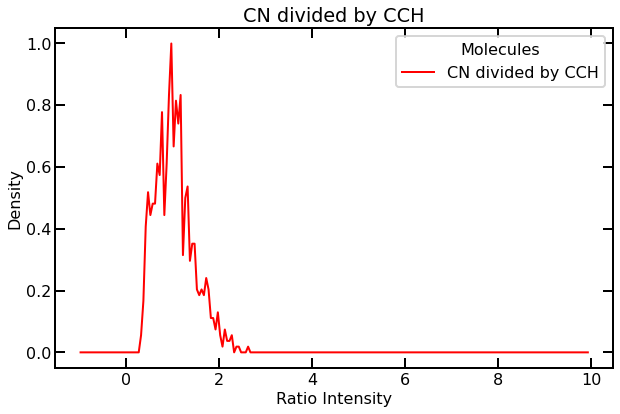

In [17]:
Data1 = MapCN.data
Data2 = MapCCH.data

Data1[Data1 < 3.0 * 0.70422] = np.nan
Data2[Data2 < 3.0 * 0.45627] = np.nan
    
Intensity_ratio = Data1/Data2
Median = np.nanmedian(Intensity_ratio)
Normalized_data = Intensity_ratio/Median
x_title = 'CN'
x_label = 'CN'
x_color = 'pink'
y_title = 'CCH'
y_label = 'CCH'
y_color = 'red'
Histogram1 = np.histogram(Normalized_data, bins=np.arange(-1,10,0.05))
    
plot((Histogram1[1][:-1] + Histogram1[1][1:])/2. ,
         (Histogram1[0])/np.nanmax(Histogram1[0]),'-', 
         color=y_color, label=(x_label + " divided by " + y_label))
plt.legend(prop={'size': 16}, title = 'Molecules')

title_text = x_title + ' divided by ' + y_title
plt.title(title_text)
plt.xlabel('Ratio Intensity')
plt.ylabel('Density')
plt.show()

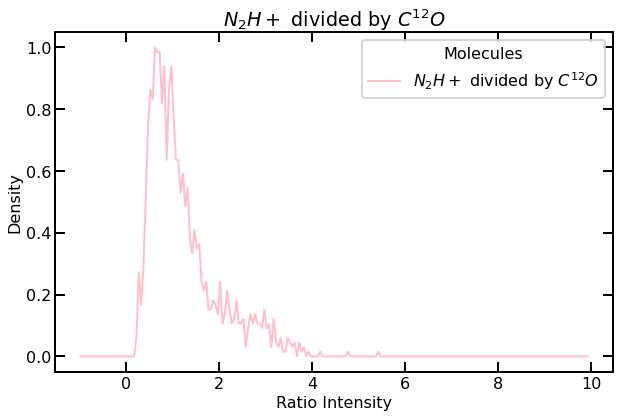

In [18]:
Data1 = MapN2Hp.data
Data2 = Map12CO.data

Data1[Data1 < 3.0 * 0.32648] = np.nan
Data2[Data2 < 3.0 * 0.94 * 0.2 * sqrt(125.-70.) * 52.*(100./115.)/60.] = np.nan
    
Intensity_ratio = Data1/Data2
Median = np.nanmedian(Intensity_ratio)
Normalized_data = Intensity_ratio/Median
x_title = '$N_2H+$'
x_label = '$N_2H+$'
x_color = 'pink'
y_title = '$C^{12}O$'
y_label = '$C^{12}O$'
y_color = 'pink'
Histogram1 = np.histogram(Normalized_data, bins=np.arange(-1,10,0.05))
    
plot((Histogram1[1][:-1] + Histogram1[1][1:])/2. ,
         (Histogram1[0])/np.nanmax(Histogram1[0]),'-', 
         color=y_color, label=(x_label + " divided by " + y_label))
plt.legend(prop={'size': 16}, title = 'Molecules')

title_text = x_title + ' divided by ' + y_title
plt.title(title_text)
plt.xlabel('Ratio Intensity')
plt.ylabel('Density')
plt.show()

Now that we can compare the ratios by eye, we need to find a more quantitative way to compare them. Below a plot which overlays the two line intenisities for us to very clearly see which pairing of emmision lines is more similar.  

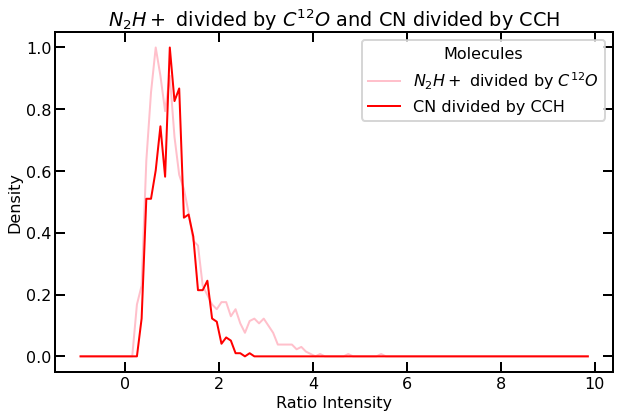

In [19]:
Data1 = MapN2Hp.data
Data2 = Map12CO.data
Data3 = MapCN.data
Data4 = MapCCH.data


Data1[Data1 < 3.0 * 0.32648] = np.nan
Data2[Data2 < 3.0 * 0.94 * 0.2 * sqrt(125.-70.) * 52.*(100./115.)/60.] = np.nan
Data3[Data3 < 3.0 * 0.70422] = np.nan
Data4[Data4 < 3.0 * 0.45627] = np.nan
    
Intensity_ratio = Data1/Data2
Intensity_ratio2 = Data3/Data4
Median = np.nanmedian(Intensity_ratio)
Median2 = np.nanmedian(Intensity_ratio2)
Normalized_data = Intensity_ratio/Median
Normalized_data2 = Intensity_ratio2/Median2

x_title = '$N_2H+$'
x_label = '$N_2H+$'
x_color = 'pink'
y_title = '$C^{12}O$'
y_label = '$C^{12}O$'
y_color = 'pink'
x_title2 = 'CN'
x_label2 = 'CN'
x_color2 = 'pink'
y_title2 = 'CCH'
y_label2 = 'CCH'
y_color2 = 'red'
Histogram1 = np.histogram(Normalized_data, bins=np.arange(-1,10,0.1))
Histogram2 = np.histogram(Normalized_data2, bins=np.arange(-1,10,0.1))
    
plot((Histogram1[1][:-1] + Histogram1[1][1:])/2. ,
         (Histogram1[0])/np.nanmax(Histogram1[0]),'-', 
         color=y_color, label=(x_label + " divided by " + y_label))
plot((Histogram2[1][:-1] + Histogram2[1][1:])/2. ,
         (Histogram2[0])/np.nanmax(Histogram2[0]),'-', 
         color=y_color2, label=(x_label2 + " divided by " + y_label2))
plt.legend(prop={'size': 16}, title = 'Molecules')

title_text = x_title + ' divided by ' + y_title + " and " + x_title2 + ' divided by ' + y_title2

plt.title(title_text)
plt.xlabel('Ratio Intensity')
plt.ylabel('Density')
plt.show()

## Subsection d: Why is this useful?

We started the program with scatter diagrams and wanted to figure how to characterize them qualitativly. We can see that a 'simply' correlated, or 'similar' scatter translates to a scatter plot with a spiky or relatively narrow histogram with a clear peak.

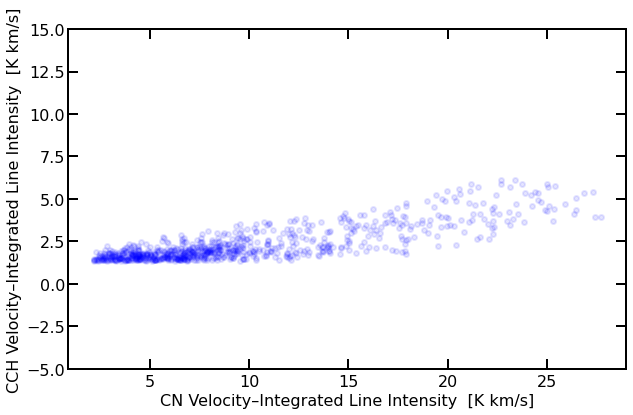

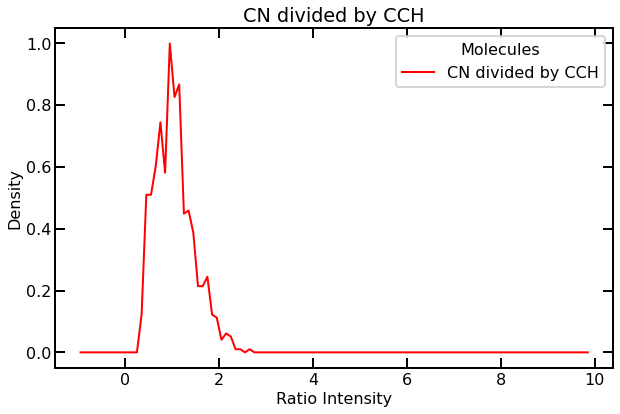

In [20]:
x = MapCN.data
y = MapCCH.data
plt.figure(1)
ax = plt.subplot(1,1,1)
plt.scatter(x, y,
            marker='.', color='blue', alpha=0.1)
ax.set_ylim([-5, 15])
ax.set_xlabel('CN Velocity–Integrated Line Intensity  [K km/s]')
ax.set_ylabel('CCH Velocity–Integrated Line Intensity  [K km/s]')

plt.show()

Data1 = MapCN.data
Data2 = MapCCH.data

Data1[Data1 < 3.0 * 0.70422] = np.nan
Data2[Data2 < 3.0 * 0.45627] = np.nan
    
Intensity_ratio = Data1/Data2
Median = np.nanmedian(Intensity_ratio)
Normalized_data = Intensity_ratio/Median
x_title = 'CN'
x_label = 'CN'
x_color = 'pink'
y_title = 'CCH'
y_label = 'CCH'
y_color = 'red'
Histogram1 = np.histogram(Normalized_data, bins=np.arange(-1,10,0.1))
    
plot((Histogram1[1][:-1] + Histogram1[1][1:])/2. ,
         (Histogram1[0])/np.nanmax(Histogram1[0]),'-', 
         color=y_color, label=(x_label + " divided by " + y_label))
plt.legend(prop={'size': 16}, title = 'Molecules')

title_text = x_title + ' divided by ' + y_title
plt.title(title_text)
plt.xlabel('Ratio Intensity')
plt.ylabel('Density')
plt.show()

Likewise a 'messy' scatter plot translates to a histogram with many peaks. 

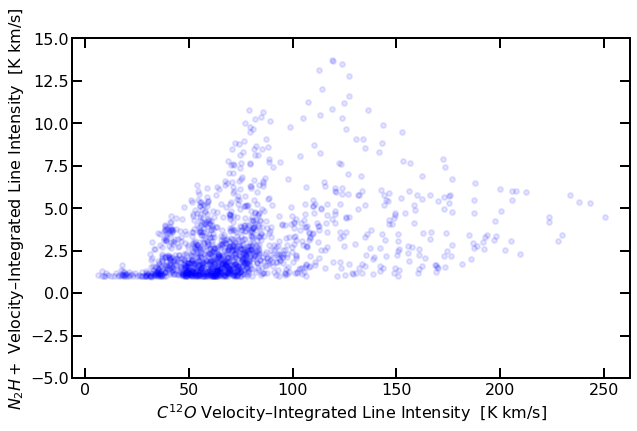

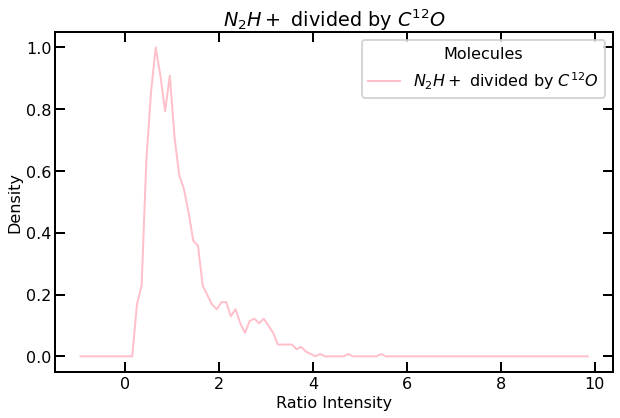

In [21]:
x = Map12CO.data
y = MapN2Hp.data
plt.figure(1)
ax = plt.subplot(1,1,1)
plt.scatter(x, y,
            marker='.', color='blue', alpha=0.1)
ax.set_ylim([-5, 15])
ax.set_xlabel('$C^{12}O$ Velocity–Integrated Line Intensity  [K km/s]')
ax.set_ylabel('$N_2H+$ Velocity–Integrated Line Intensity  [K km/s]')

plt.show()


Data1 = MapN2Hp.data
Data2 = Map12CO.data

Data1[Data1 < 3.0 * 0.32648] = np.nan
Data2[Data2 < 3.0 * 0.94 * 0.2 * sqrt(125.-70.) * 52.*(100./115.)/60.] = np.nan
    
Intensity_ratio = Data1/Data2
Median = np.nanmedian(Intensity_ratio)
Normalized_data = Intensity_ratio/Median
x_title = '$N_2H+$'
x_label = '$N_2H+$'
x_color = 'pink'
y_title = '$C^{12}O$'
y_label = '$C^{12}O$'
y_color = 'pink'
Histogram1 = np.histogram(Normalized_data, bins=np.arange(-1,10,0.1))
    
plot((Histogram1[1][:-1] + Histogram1[1][1:])/2. ,
         (Histogram1[0])/np.nanmax(Histogram1[0]),'-', 
         color=y_color, label=(x_label + " divided by " + y_label))
plt.legend(prop={'size': 16}, title = 'Molecules')

title_text = x_title + ' divided by ' + y_title
plt.title(title_text)
plt.xlabel('Ratio Intensity')
plt.ylabel('Density')
plt.show()

By looking at the histograms, we can categorize the scatter plots. 

# Section 3: Main Program

In this program, we choose to do this by looking at the full width at half max. This basically means at half of the maximum of the plot, what is the distance between the left and right side of the histogram. A histogram with a smaller full width half max (fwhm), will be a more strongly coorelated ratio than a larger fwhm. In addition, a narrow histogram corresponds to a strongly coorelated scatter plot, and a wide histogram coresponds to a 'messy' or wide scatter plot. 

The way we would code this is to make a function that find the fwhm. It finds the value at half max left of the center, the value at half max to the right of the center, and then finds the distance in between those two numbers.

In [22]:
def fwhm(y_values_temp, x_values):
    y_values, temp_l, temp_r = [], [], []

    for x in range(0,len(y_values_temp)):
        y_values.append(y_values_temp[x])
    
    peak_height = max(y_values)
    half_peak_height = max(y_values)/2
    
    y_l_temp = y_values[0:y_values.index(peak_height)]
    y_r_temp = y_values[y_values.index(peak_height):len(y_values)]
    
    y_l = nsmallest(1, y_l_temp, key=lambda x: abs(x-half_peak_height))
    y_r = nsmallest(1, y_r_temp, key=lambda x: abs(x-half_peak_height))
    
    print("Left bin is " + str(y_l) + " and the right bin is " + str(y_r))
    
    temp_l.append(x_values[y_l.index(y_l[0])])
    temp_r.append(x_values[y_r.index(y_r[0]) + len(y_l) -1])
    fwhm_n = temp_l[0] - temp_r[0]
    
    return abs(fwhm_n)


Then we run the histograms through the function and display the fwhm

In [23]:
print("this is the fwhm: " + str(fwhm(Histogram1[0], Histogram1[1])))

Left bin is [83] and the right bin is [61]
this is the fwhm: 0.0


## Subsection a: Functions and Set-Up

Next we are going to make a series of functions that will actually make the plots automatically. These plots are going to be scaled by the median between the left and right side of the histogram, and the distance between those sides at 10 percent of the maximum of the histogram. To change the scaling, change the results_array.sort(key = lambda x: x[16]) to a different number based on the results_array. 

This next function will enable us to find the closest number to the number we want. We will use this particular function to find the datapoint closest to the number equal to 0.1 times the maximum of the histogram. We can use these number to find the full width at 10 percent max. 

In [24]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array-value)).argmin()
    return array[idx]

Now we are making an empty array for us to add stuff to later. This will include all relavent information related to the plots, and we will use this information to display the plots in increasing order. 

In [25]:
fwm_info = []

We then create a dictionary of the information that we will plug into the function. The function runs all possible combinations of pairs of molecules possible, so the only thing we need to do to add more molecules and have all possible combinations is to add to this dictionary. This is called production style code, and we are using this because it makes us a tool that can be used without supervision for as many molecules as we would like. We want it to be ratios, so we take one molecule's, and divide by the other molecule's dataset to get the ratio. We need the function to run automatically to get all possible combinations of ratios. 

The first column is the actual data, the second column is the title we want to be displayed, the third colum in the standardized color of each molecule so we always know what we are looking at, and the fourth and final column is the noise line.

In [26]:
data_dictionary = [
{"data_set": Map12CO.data,"title": '$^{12}CO$' , "standardized_color": 'pink' , "noiseline": 1.05073560014},
{"data_set": Map13CO.data, "title": '$^{13}CO$' , "standardized_color": 'red' , "noiseline": 0.3272},
{"data_set": MapC18O.data, "title": '$C^{18}O$' , "standardized_color": 'orange' , "noiseline": 0.17549},
{"data_set": MapN2Hp.data, "title": '$N_2H^+$' , "standardized_color": 'brown' , "noiseline": 0.32648},
{"data_set": MapHCN.data, "title": 'HCN' , "standardized_color": 'blue' , "noiseline": 0.52463},
{"data_set": MapCN.data, "title": 'CN' , "standardized_color": 'green' , "noiseline": 0.70422},
{"data_set": MapCCH.data, "title": 'CCH' , "standardized_color": 'purple' , "noiseline": 0.45627}]


for x_index in range(len(data_dictionary)):
    data_dictionary[x_index]['brightness'] = np.sum((data_dictionary[x_index]['data_set'] / data_dictionary[x_index]['noiseline']) > 3)
    #print(data_dictionary[x_index]['brightness'])

    
list_of_x = sorted(data_dictionary, key=lambda d: d['brightness'], reverse=True)

Next we have the function that actually makes the histograms. I had to make a 'class' so that I could explain each part of the function with stops in the middle of the function. I made each part of the function into it's own function, while appending all necessary variables to the class called 'variables' so that the next function could access it. 

In [27]:
class variables:
    a=0

In [28]:
def function_pt_1():
    variables.Data1 = variables.x_array['data_set'].flatten()
    variables.Data2 = variables.y_array['data_set'].flatten()  
        
    variables.Data1[variables.Data1 < 3.0 * variables.x_array['noiseline']] = np.nan
    variables.Data2[variables.Data2 < 3.0 * variables.y_array['noiseline']] = np.nan
    
    variables.x_noiseline = variables.x_array['noiseline']
    variables.y_noiseline = variables.y_array['noiseline']
        
    variables.x_title = variables.x_array['title']
    variables.x_color = variables.x_array['standardized_color']
    variables.y_title = variables.y_array['title']
    variables.y_color = variables.y_array['standardized_color']

Still in the function, we set the ratio as one molecule divided by the the other molecule. We also load in the first and second molecules title, and color. We set the histogram as the ratio, with it's bin size being from -median to 10 times the median, with a bin every 0.05 times the median. We then put the histogram through the rolling average one more time. 

In [29]:
def function_pt_2():
    variables.Intensity_ratio = variables.Data2/variables.Data1
    variables.Median = np.nanmedian(variables.Intensity_ratio)
    variables.Normalized_ratio = variables.Intensity_ratio/variables.Median
    
    
    variables.Histogram1, variables.bins1 = np.histogram(variables.Normalized_ratio, bins=np.arange(-1,10,0.05))
    variables.Histogram1_smoothed = variables.Histogram1

Then we set out the y value the program will find the corresponding x value to. We enabled it at 10% of the max. If you wanted to change this number, change the '0.1' to something else, and it will change it everywhere. We also find the maximum number in the histogram. The last two lines we are setting arrays that are all values left of the center, and all values right of the center. We need this to find one value in places that there are two number per x value, as this will create error and generally confuse the computer. 

In [30]:
def function_pt_3():
    variables.center_10 = (variables.bins1[:-1] + variables.bins1[1:]) * 0.1
    
    variables.index_at_max_y_for_histogram_1 = np.nanmax(np.where(variables.Histogram1_smoothed == np.nanmax(variables.Histogram1_smoothed))[0])
    
    variables.left_of_the_center_array = variables.Histogram1_smoothed[:variables.index_at_max_y_for_histogram_1]
    variables.right_of_the_center_array = variables.Histogram1_smoothed[variables.index_at_max_y_for_histogram_1:]

Now we set a whole ton of variables where we find the numbers closest to the left and right side of the histograms at the selected y value (in this case 10 percent of the maximum). 

In [31]:
def function_pt_4():
    variables.max10_of_left_of_the_center_array = find_nearest(variables.left_of_the_center_array, np.nanmax(variables.Histogram1_smoothed)/10)
    variables.max10_of_right_of_the_center_array = find_nearest(variables.right_of_the_center_array, np.nanmax(variables.Histogram1_smoothed)/10)
    variables.index_of_left_of_the_center_array_10 = (np.where(variables.left_of_the_center_array == variables.max10_of_left_of_the_center_array))[0]
    variables.index_of_right_of_the_center_array_10 = (np.where(variables.right_of_the_center_array == variables.max10_of_right_of_the_center_array))[0]
    

We then set what is the right and left side.

In [32]:
def function_pt_5():
    variables.left_side_10 = variables.center_10[variables.index_of_left_of_the_center_array_10]
    variables.right_side_10 = variables.center_10[(variables.index_of_right_of_the_center_array_10 + variables.index_at_max_y_for_histogram_1)]


And figure out what they are for the specific values.

In [33]:
def function_pt_6():
    variables.fw10m = np.nanmax(variables.right_side_10) - np.nanmax(variables.left_side_10)
    variables.fw10m_scaled_by_left_bin = variables.fw10m / np.nanmax(variables.right_side_10)
    variables.median_of_sides = (np.nanmax(variables.right_side_10) + np.nanmax(variables.left_side_10)) / 2
    variables.fw10m_scaled_by_median_of_the_bins = variables.fw10m / variables.median_of_sides
    variables.fw10m_scaled_by_maximum = variables.fw10m / np.nanmax(variables.Histogram1_smoothed)


We set the plot title. We also divide the entire histogram by the peak of the histogram, to make the chart peak at one. 

In [34]:
def function_pt_7():
    variables.title_text = variables.y_title + ' divided by ' + variables.x_title
    variables.histogram = (variables.Histogram1_smoothed)/np.nanmax(variables.Histogram1_smoothed)


Then we set up our dictionary to record all of the information and save the dictionary.

In [35]:
def function_pt_8():
    variables.fwhm = 10
    variables.return_dictionary = {"title_text": variables.title_text, "x_label": variables.x_title, "y_label": variables.y_title, 
                               "y_color": variables.y_color, "histogram": variables.histogram,
                   "fwhm": variables.fwhm, "fw10m_scaled_by_median_of_the_bins": variables.fw10m_scaled_by_median_of_the_bins, 
                               "fw10m_scaled_by_maximum": variables.fw10m_scaled_by_maximum, 
                   "center_10": variables.center_10, "x_data": variables.Data1, "y_data": variables.Data2,
                             "x_noiseline": variables.x_noiseline, "y_noiseline": variables.y_noiseline}


Lastly we have a function that runs all of the smaller functions. This is the function that we will use later in the program.

In [36]:
def plot_normalized_intensity_versus_density(x_array, y_array):
    variables.x_array = x_array
    variables.y_array = y_array
    
    function_pt_1()
    function_pt_2()
    function_pt_3()
    function_pt_4()
    function_pt_5()
    function_pt_6()
    function_pt_7()
    function_pt_8()
    
    return variables.return_dictionary



## Subsection b: Scaling

Now that we have the fwhm, we can rank the coorelation of the ratios of the molecules. That being said, we have to scale the fwhm so based on percentages, because the computer may rank the number incorrectly based on the histograms intensity. 

A simple way to clearly explain this is with this example. One histogram ranging from 1 to 5 has a fwhm of 3. Another histogram ranging from 1 to 10 has a fwhm of 4. The computer would recognize that 4 is larger than 3 and first histogram as having a stronger coorelation. However, we must take into account that the fwhm of the first histogram is 60% of the plot, and the fwhm of the second plot is only 40% of the plot, so the second histogram is actually more closely coorelated than the first plot, even though the integer is larger. 

If we did not have the scaling and ranked which of the two histograms below are more similar, the computer would say the second histogram is narrower and therefore more similar. However, we can tell by eye that of the two, the first histogram is narrower. The scaling serves to solve this problem because the widths are analysed by the program on the standardized scale.

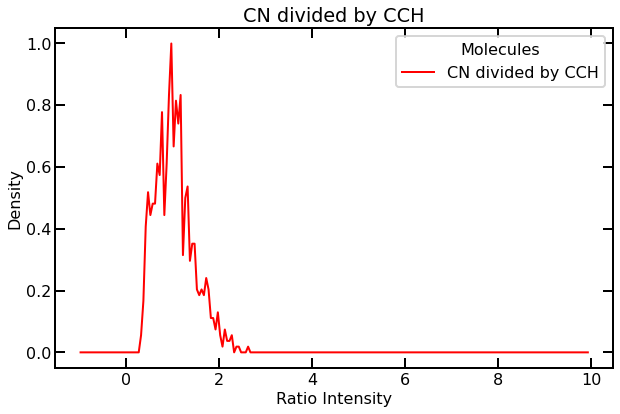

In [37]:
Data1 = MapCN.data
Data2 = MapCCH.data
    
Intensity_ratio = Data1/Data2
Median = np.nanmedian(Intensity_ratio)
Normalized_data = Intensity_ratio/Median
x_title = 'CN'
x_label = 'CN'
x_color = 'pink'
y_title = 'CCH'
y_label = 'CCH'
y_color = 'red'
Histogram1 = np.histogram(Normalized_data, bins=np.arange(-1,10,0.05))
    
plot((Histogram1[1][:-1] + Histogram1[1][1:])/2. ,
         (Histogram1[0])/np.nanmax(Histogram1[0]),'-', 
         color=y_color, label=(x_label + " divided by " + y_label))
plt.legend(prop={'size': 16}, title = 'Molecules')

title_text = x_title + ' divided by ' + y_title
plt.title(title_text)
plt.xlabel('Ratio Intensity')
plt.ylabel('Density')
plt.show()

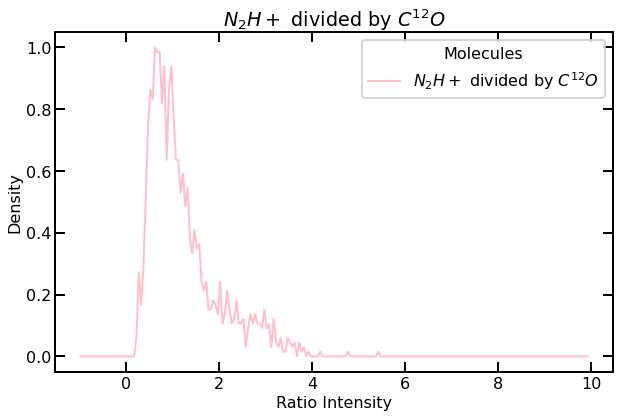

In [38]:
Data1 = MapN2Hp.data
Data2 = Map12CO.data
    
Intensity_ratio = Data1/Data2
Median = np.nanmedian(Intensity_ratio)
Normalized_data = Intensity_ratio/Median
x_title = '$N_2H+$'
x_label = '$N_2H+$'
x_color = 'pink'
y_title = '$C^{12}O$'
y_label = '$C^{12}O$'
y_color = 'pink'
Histogram1 = np.histogram(Normalized_data, bins=np.arange(-1,10,0.05))

plot((Histogram1[1][:-1] + Histogram1[1][1:])/2. ,
         (Histogram1[0])/np.nanmax(Histogram1[0]),'-', 
         color=y_color, label=(x_label + " divided by " + y_label))

plt.legend(prop={'size': 16}, title = 'Molecules') 

title_text = x_title + ' divided by ' + y_title
plt.title(title_text)
plt.xlabel('Ratio Intensity')
plt.ylabel('Density')
plt.show()

# Section 4: Display Charts

Now we are going to make a function to display the charts.

In [39]:
class v:
    a=0

def function_a(return_dictionary):
    v.x_label = return_dictionary['x_label']
    v.y_label = return_dictionary['y_label']
    v.y_color = return_dictionary['y_color']
    v.x_data = return_dictionary['x_data']
    v.y_data = return_dictionary['y_data']
    v.title_text = return_dictionary['title_text']
    v.histogram = return_dictionary['histogram']
    
    v.fw10m_scaled_by_median_of_the_bins = return_dictionary['fw10m_scaled_by_median_of_the_bins']
    v.fw10m_scaled_by_maximum = return_dictionary['fw10m_scaled_by_maximum']
    v.center_10 = return_dictionary['center_10']
    

Still in the function, we make an 'if statement' to use the information relavent to the chart type we set earlier. We just want to make sure the program can do all of the possible options, and uses the correct information for that specific chart type.

In [40]:
def function_b():
    v.x = v.center_10
    v.y = v.histogram
    print("fullwidth at 10% max scaled by the median is = " + str(v.fw10m_scaled_by_median_of_the_bins))

This segment of code (still in the print_charts function) is the thing that actually displays the histogram. We set the titles, color, and axis names. The last line shows the plot.

In [41]:
def function_c():
    v.Intensity_ratio = v.x_data/v.y_data
    v.Median = np.nanmedian(v.Intensity_ratio)
    v.Normalized_data = v.Intensity_ratio/v.Median
    v.Histogram1 = np.histogram(v.Normalized_data, bins=np.arange(-1,10,0.05))

    v.title_text = v.y_label + " divided by " + v.x_label
    
    plot((v.Histogram1[1][:-1] + v.Histogram1[1][1:])/2. ,
         (v.Histogram1[0])/np.nanmax(v.Histogram1[0]),'-', 
         color=v.y_color, label=(v.x_label + " divided by " + v.y_label))
    
    plt.title(v.title_text)
    plt.xlabel('Ratio Intensity')
    plt.ylabel('Density')
    plt.show()

In [42]:
def print_charts(return_dictionary, chart_type):
    function_a(return_dictionary)
    function_b()
    function_c()

To make sure the correct number of charts display, we make a 'for loop' that skips the pair if the pair had already been apended to the array 'already_done'. When the pair is done, we append that pair to the already_done array. Instead of showing the plots just yet, we append the pair of titles to an array called the 'results_array' from which we will draw to show the plots once we rank them in increasing order.

In [43]:
already_done = []
results_array = []

for x in list_of_x:

    for y in list_of_x:
        if x['title'] == y['title']: pass
        elif [x['title'],y['title']] in already_done or [y['title'],x['title']] in already_done: pass
        else:
            this_results_array = plot_normalized_intensity_versus_density(x, y)
            #print((plot_normalized_intensity_versus_density(x,y))["title_text"])
            already_done.append([x['title'],y['title']])
            results_array.append(this_results_array)

We just have a few final lines of code left. First we set the chart type to 'center_10', meaning that we take the full width at ten percent max. 

In [44]:
chart_type = 'center_10'    

Then we rank the histograms by the increasing full width at x percent max value. 

In [45]:
results_array.sort(key = lambda x: x['fw10m_scaled_by_median_of_the_bins'])

Lastly, we have it print every pair of charts in the results array. 

0.9545454545454538
fullwidth at 10% max scaled by the median is = 0.9545454545454538


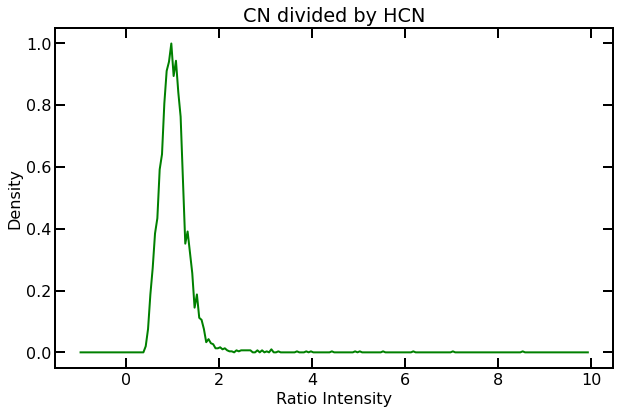

1.0952380952380945
fullwidth at 10% max scaled by the median is = 1.0952380952380945


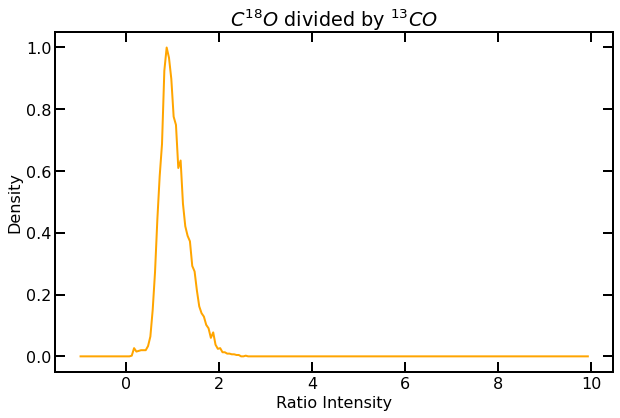

1.1914893617021267
fullwidth at 10% max scaled by the median is = 1.1914893617021267


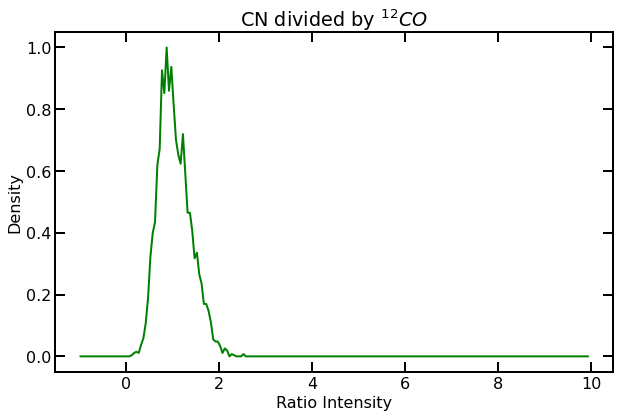

1.2083333333333326
fullwidth at 10% max scaled by the median is = 1.2083333333333326


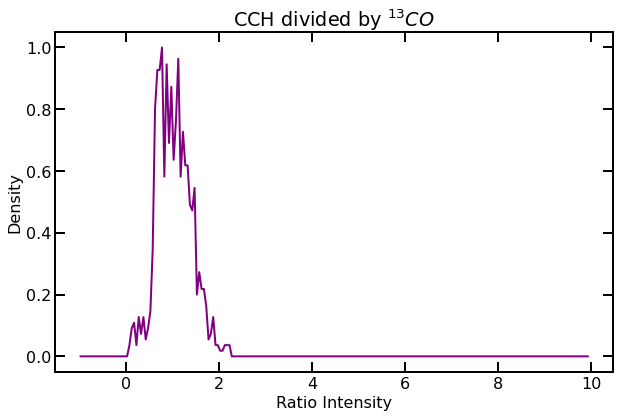

1.2444444444444436
fullwidth at 10% max scaled by the median is = 1.2444444444444436


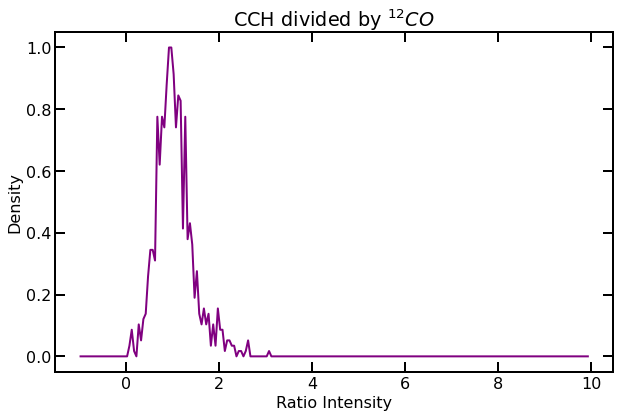

1.3061224489795908
fullwidth at 10% max scaled by the median is = 1.3061224489795908


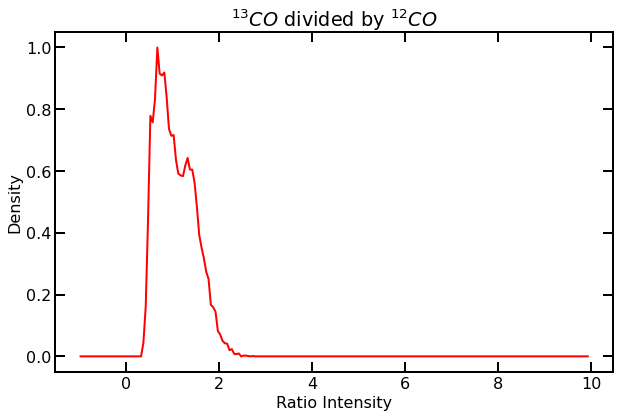

1.319999999999999
fullwidth at 10% max scaled by the median is = 1.319999999999999


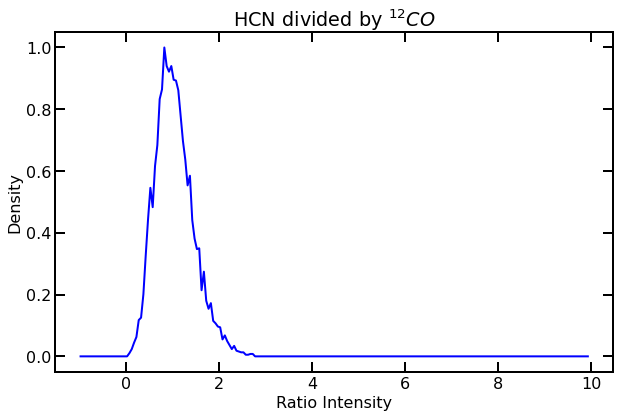

1.4035087719298238
fullwidth at 10% max scaled by the median is = 1.4035087719298238


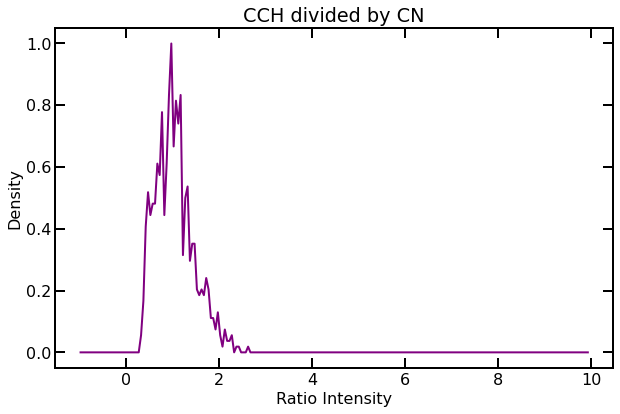

1.4693877551020398
fullwidth at 10% max scaled by the median is = 1.4693877551020398


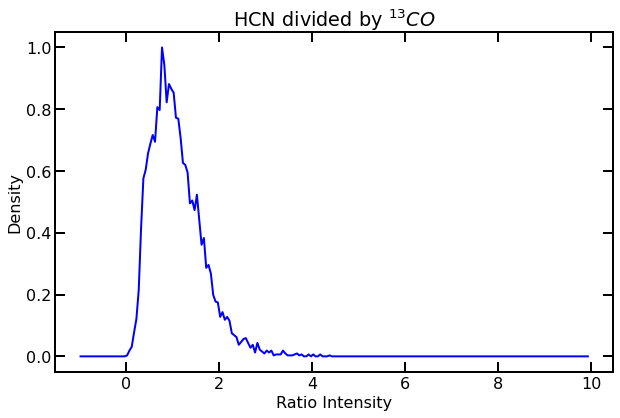

1.4799999999999989
fullwidth at 10% max scaled by the median is = 1.4799999999999989


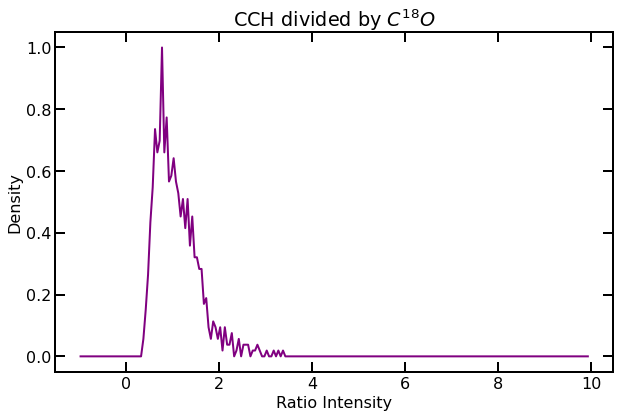

1.5357142857142847
fullwidth at 10% max scaled by the median is = 1.5357142857142847


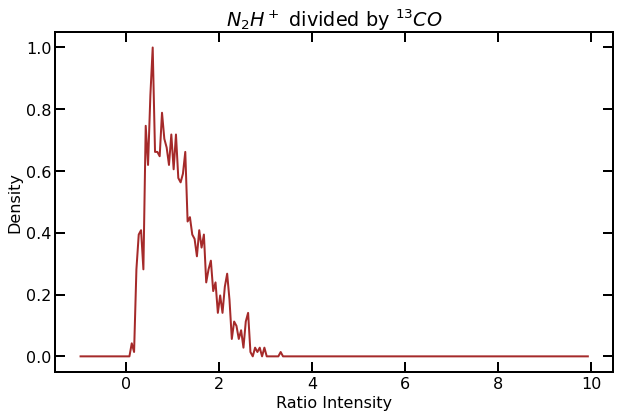

1.5510204081632644
fullwidth at 10% max scaled by the median is = 1.5510204081632644


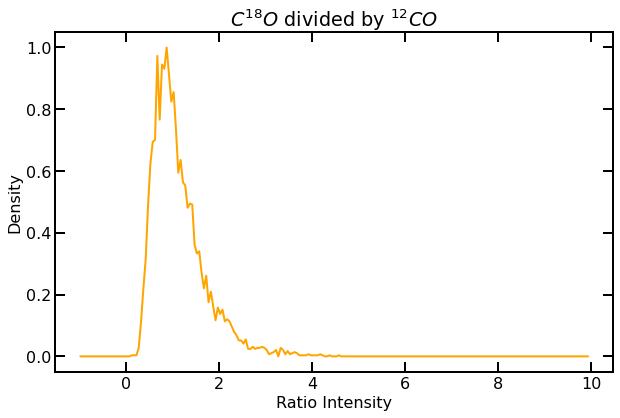

1.5517241379310336
fullwidth at 10% max scaled by the median is = 1.5517241379310336


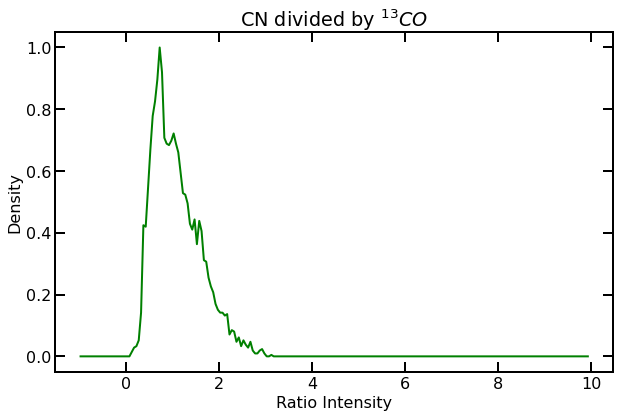

1.5849056603773575
fullwidth at 10% max scaled by the median is = 1.5849056603773575


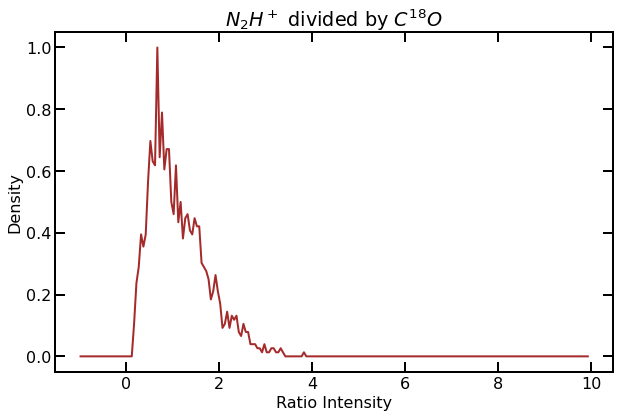

1.6538461538461526
fullwidth at 10% max scaled by the median is = 1.6538461538461526


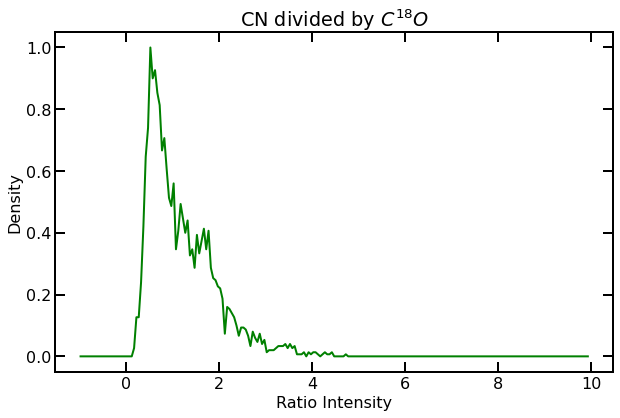

1.6666666666666654
fullwidth at 10% max scaled by the median is = 1.6666666666666654


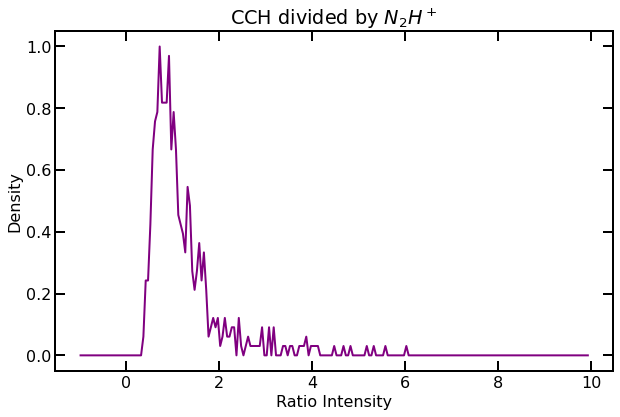

1.727272727272726
fullwidth at 10% max scaled by the median is = 1.727272727272726


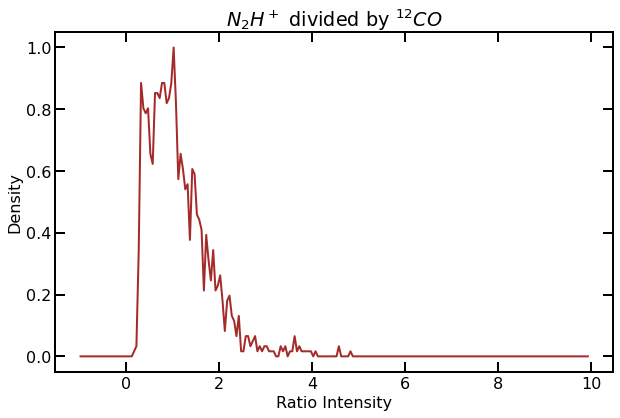

1.7454545454545443
fullwidth at 10% max scaled by the median is = 1.7454545454545443


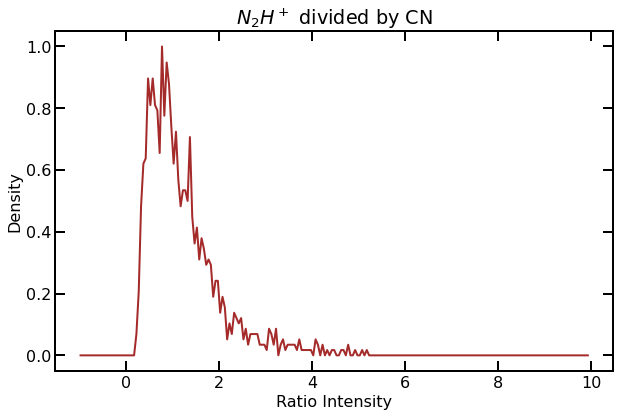

1.8148148148148135
fullwidth at 10% max scaled by the median is = 1.8148148148148135


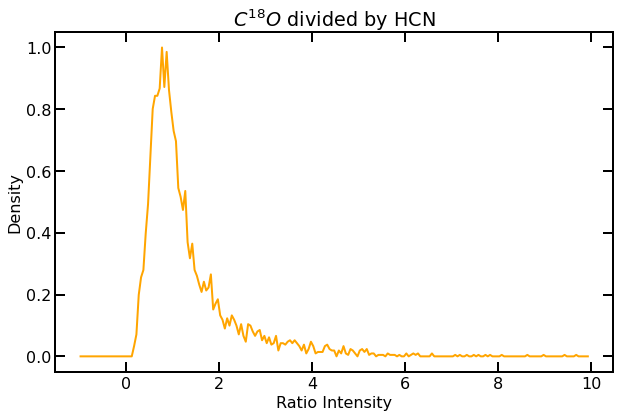

1.8181818181818168
fullwidth at 10% max scaled by the median is = 1.8181818181818168


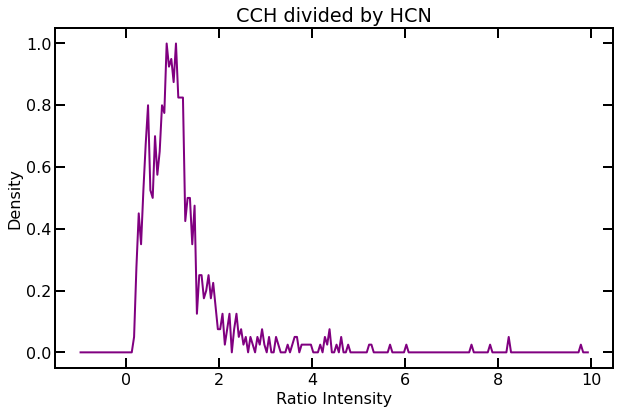

1.8867924528301872
fullwidth at 10% max scaled by the median is = 1.8867924528301872


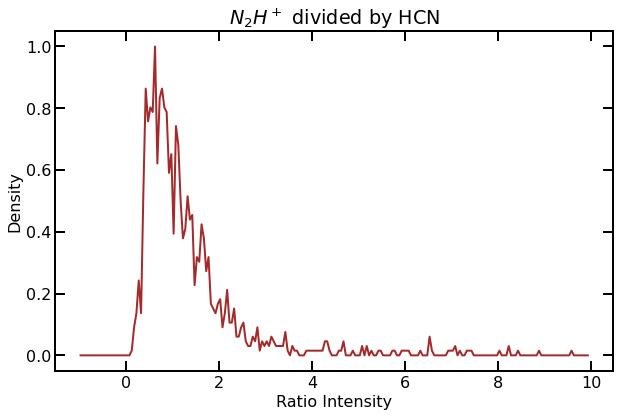

In [46]:
for this_result in results_array:
    print(this_result['fw10m_scaled_by_median_of_the_bins'])
    print_charts(this_result, chart_type)